In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [35]:
num_points = 100
dimensions = 2
points = np.random.uniform(0, 1000, [num_points, dimensions])

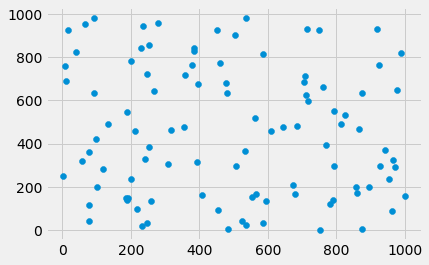

In [36]:
plt.scatter(points[:,0], points[:,1])

In [40]:
def input_fn():
    return tf.compat.v1.train.limit_epochs(
        tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

In [41]:
K = 5
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=K, use_mini_batch=False)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp3wefzpow', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [42]:
num_iterations = 10
previous_centers = None

for _ in range(num_iterations):
    kmeans.train(input_fn)
    cluster_centers = kmeans.cluster_centers()
    if previous_centers is not None:
        print('delta: ', cluster_centers - previous_centers)
    previous_centers = cluster_centers
    print('score: ', kmeans.score(input_fn))

print ('cluster centers', cluster_centers)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
Prefer Dataset.range instead.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp3wefzpow/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1...
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp3wefzpow/model.ckpt.
INFO:tensorflow:Calling checkp

INFO:tensorflow:Saving checkpoints for 7 into /tmp/tmp3wefzpow/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7...
INFO:tensorflow:loss = 3718250.2, step = 8
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9...
INFO:tensorflow:Saving checkpoints for 9 into /tmp/tmp3wefzpow/model.ckpt.
Instructions for updating:
Use standard file APIs to delete files with this prefix.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 9...
INFO:tensorflow:Loss for final step: 3718250.2.
delta:  [[ 16.791931   20.401306 ]
 [  0.          0.       ]
 [ 32.003494   -3.0963135]
 [  8.574402  -13.685608 ]
 [ 29.030853   33.717773 ]]
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-19T18:11:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3wefzpow/model.ckpt-9
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done runnin

INFO:tensorflow:Restoring parameters from /tmp/tmp3wefzpow/model.ckpt-17
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 17...
INFO:tensorflow:Saving checkpoints for 17 into /tmp/tmp3wefzpow/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 17...
INFO:tensorflow:loss = 3564518.5, step = 17
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 19...
INFO:tensorflow:Saving checkpoints for 19 into /tmp/tmp3wefzpow/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 19...
INFO:tensorflow:Loss for final step: 3564518.5.
delta:  [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-19T18:11:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3wefzpow/model.ckpt-19
I

In [64]:
cluster_indices = np.array(list(kmeans.predict_cluster_index(input_fn)))
for i, point in enumerate(points):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  print('point:', point, 'is in cluster', cluster_index, 'centered at', center)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3wefzpow/model.ckpt-19
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[3 2 0 0 0 4 1 1 2 1 3 2 0 4 1 3 0 0 4 0 0 3 4 2 2 1 0 2 1 2 3 3 2 3 0 1 3
 3 4 4 0 1 2 1 0 2 3 0 2 3 2 1 0 1 3 1 4 4 0 1 4 2 3 0 1 3 1 1 4 1 4 0 3 0
 3 3 1 0 2 4 2 0 2 1 0 3 3 0 1 1 4 3 0 1 3 0 1 3 1 0]
point: [710.33683911 626.40679207] is in cluster 3 centered at [755.1912  652.77936]
point: [187.67538033 141.71232113] is in cluster 2 centered at [145.71333 184.90651]
point: [537.37310249 982.42352894] is in cluster 0 centered at [262.33105 805.98773]
point: [  6.84744966 756.92343328] is in cluster 0 centered at [262.33105 805.98773]
point: [382.90561758 829.15120368] is in cluster 0 centered at [262.33105 805.98773]
point: [482.89947388   4.95530098] is in cluster 4 centered at [353.7713  319.09024]
point: [999.51023615

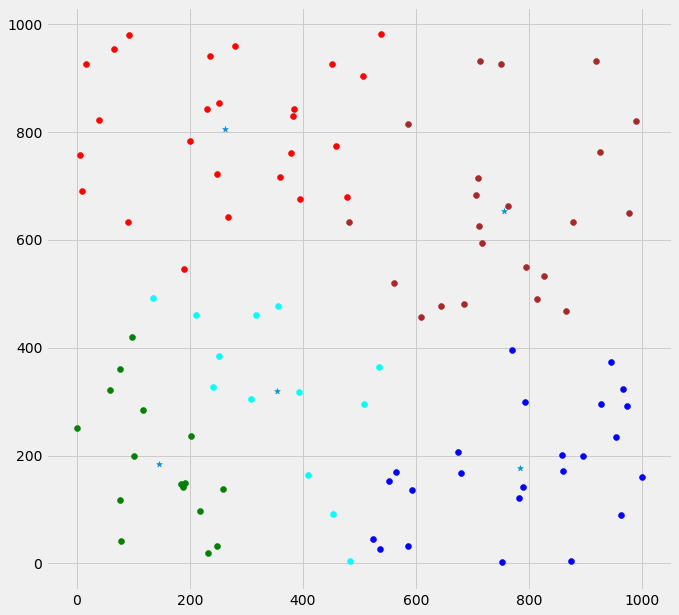

In [80]:
plt.figure(figsize=(10,10))
plt.scatter(points[cluster_indices == 0][:,0], points[cluster_indices == 0][:,1], color='red')
plt.scatter(points[cluster_indices == 1][:,0], points[cluster_indices == 1][:,1], color='blue')
plt.scatter(points[cluster_indices == 2][:,0], points[cluster_indices == 2][:,1], color='green')
plt.scatter(points[cluster_indices == 3][:,0], points[cluster_indices == 3][:,1], color='brown')
plt.scatter(points[cluster_indices == 4][:,0], points[cluster_indices == 4][:,1], color='cyan')
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='*')
plt.show()